
---


**<center>Pandit Deendayal Energy University**<br>
**School of Technology**<br>
**Machine Learning Lab (20CP401P)**<br>
**B.Tech-Computer Science & Engineering (Sem-VII)**<br>


Name: Mire Kishorkumar Patel<br>
Roll No.: 19BCP080<br>
Branch: Computer Science & Engineering<br>

Lab Project<br>
DOG BREED CLASSIFICATION USING TRANSFER LEARNING

---

**• PROBLEM STATEMENT : Dog Breed Classifation**

> **Group Members**

>> *Mire Patel - 19BCP0080 - mire.pce19@sot.pdpu.ac.in*

>> *Parth Patel - 19BCP091 - parth.pce19@sot.pdpu.ac.in*

>> *Mit Patel - 19BCP082 - mit.pce19@sot.pdpu.ac.in*

>> *Marco Chichava - 19BCP078 - marco.cce19@sot.pdpu.ac.in*

**• Project Source Code**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
from IPython.display import display, Image
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import datetime

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Load the data**

In [ ]:
df = pd.read_csv("../input/dog-breed-identification/labels.csv")
df.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<AxesSubplot:>

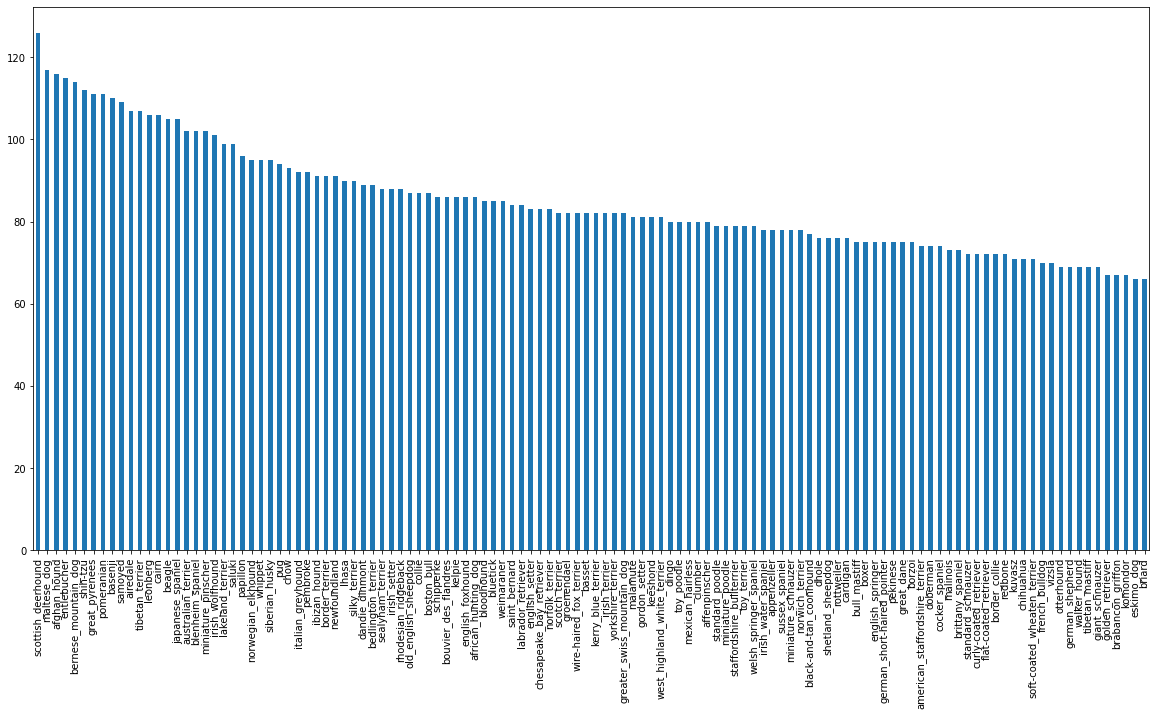

In [ ]:
df["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
filenames = ["../input/dog-breed-identification/train/" + fname + ".jpg" for fname in df["id"]]
filenames[:5]

['../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

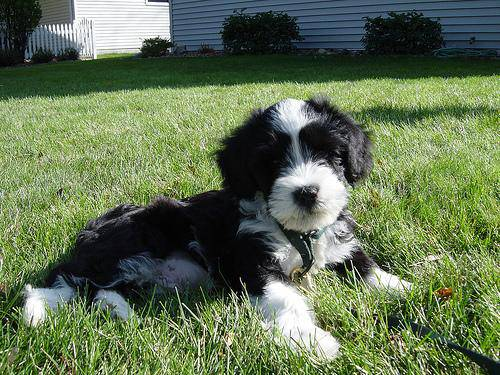

In [ ]:
Image(filenames[random.randint(0, len(filenames))])

In [ ]:
labels = df["breed"].to_numpy()
labels[:5]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
      dtype=object)

In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[2]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
print(labels[0]) 
print(np.where(unique_breeds == labels[0])[0][0]) 
print(boolean_labels[0].argmax()) 
print(boolean_labels[0].astype(int)) 

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
X = filenames
y = boolean_labels
NUM_IMAGES = 10000
IMG_SIZE = 224

**Splitting data into Train and test sets**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

**Preprocessing images (turning images into Tensors)**

In [ ]:
def process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image



**Creating data batches**

In [ ]:
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

In [ ]:
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) 
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), 
                                              tf.constant(y))) 
        data = data.shuffle(buffer_size=len(x))
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

**Visualizing data batches**

In [ ]:
def show_images(images, labels):
    plt.figure(figsize=(12, 12))
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

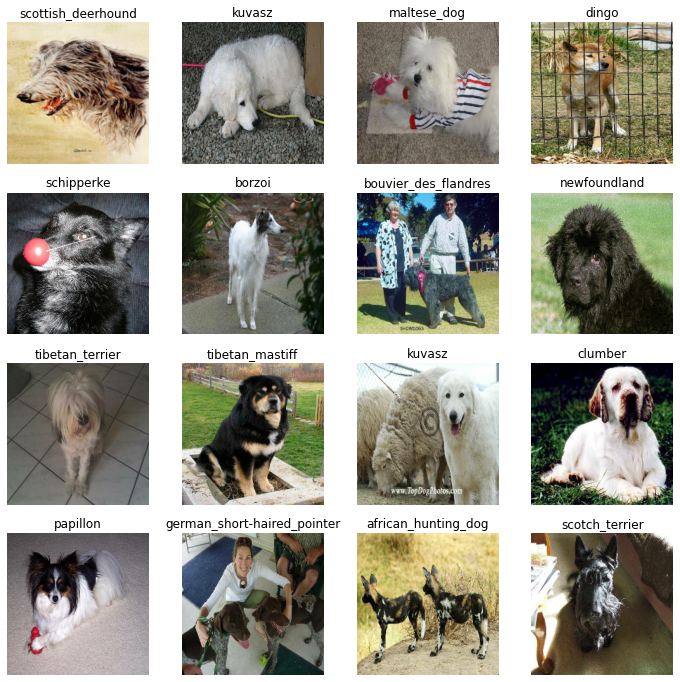

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

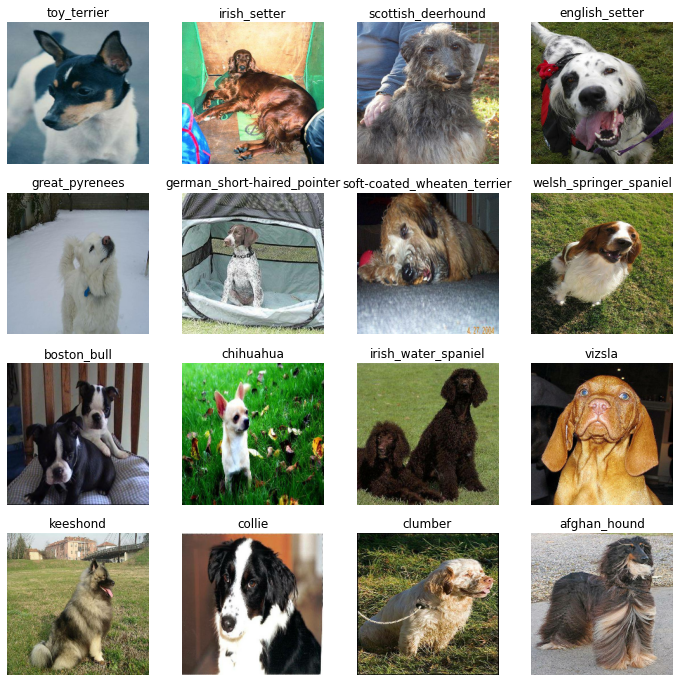

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)



**Building a model (MOBILENET)**

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] 
OUTPUT_SHAPE = len(unique_breeds) 
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
NUM_EPOCHS = 100

In [ ]:
model_1 = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")])

model_1.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(), 
        optimizer=tf.keras.optimizers.Adam(), 
        metrics=["accuracy"])

model_1.build(INPUT_SHAPE)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


**TensorBoard Callback**

In [ ]:
!mkdir logs

In [ ]:
def create_tensorboard_callback():
    logdir = os.path.join("./logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)


**Training a model**

In [ ]:
tensorboard_1 = create_tensorboard_callback()

early_stopping_1 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) 
model_1.fit(x=train_data,
            epochs=NUM_EPOCHS,  
            validation_data=val_data,
            validation_freq=1, 
            callbacks=[tensorboard_1, early_stopping_1])

Epoch 1/100
256/256 [==============================] - 79s 247ms/step - loss: 1.4983 - accuracy: 0.6367 - val_loss: 0.7183 - val_accuracy: 0.7946
Epoch 2/100
256/256 [==============================] - 33s 128ms/step - loss: 0.4192 - accuracy: 0.8809 - val_loss: 0.6739 - val_accuracy: 0.7995
Epoch 3/100
256/256 [==============================] - 33s 128ms/step - loss: 0.2374 - accuracy: 0.9382 - val_loss: 0.6465 - val_accuracy: 0.8010
Epoch 4/100
256/256 [==============================] - 33s 129ms/step - loss: 0.1519 - accuracy: 0.9665 - val_loss: 0.6616 - val_accuracy: 0.7995
Epoch 5/100
256/256 [==============================] - 32s 126ms/step - loss: 0.1010 - accuracy: 0.9830 - val_loss: 0.6557 - val_accuracy: 0.8088
Epoch 6/100
256/256 [==============================] - 33s 129ms/step - loss: 0.0750 - accuracy: 0.9895 - val_loss: 0.6794 - val_accuracy: 0.8054
Epoch 7/100
256/256 [==============================] - 33s 129ms/step - loss: 0.0556 - accuracy: 0.9949 - val_loss: 0.6889 -

In [ ]:
predictions = model_1.predict(val_data, verbose=1) 
predictions

64/64 [==============================] - 6s 87ms/step


array([[2.70703321e-10, 7.81536728e-12, 3.33291644e-10, ...,
        1.72037751e-09, 1.16869035e-06, 3.01754461e-08],
       [9.55909685e-10, 3.00523027e-07, 2.72525225e-10, ...,
        2.92657676e-09, 4.06130095e-11, 4.04263938e-06],
       [5.35029665e-09, 1.11638622e-06, 9.26579631e-08, ...,
        4.08882397e-06, 3.38426133e-07, 1.25366375e-08],
       ...,
       [7.04623582e-11, 2.95483517e-07, 6.08564657e-11, ...,
        2.01519995e-10, 7.54316876e-09, 7.48012894e-07],
       [2.64497343e-12, 4.31119862e-10, 4.26423567e-12, ...,
        1.13196995e-12, 1.02160624e-09, 5.58676423e-13],
       [1.03015026e-07, 7.23484517e-09, 4.51321824e-08, ...,
        8.15797208e-09, 1.16030567e-10, 9.49747614e-10]], dtype=float32)

In [ ]:
predictions.shape

(2045, 120)

In [ ]:
print(predictions[0], end='\n\n\n')
print(f"Max value (probability of prediction): {np.max(predictions[0])}") 
print(f"Sum: {np.sum(predictions[0])}") 
print(f"Max index: {np.argmax(predictions[0])}") 
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") 

[2.7070332e-10 7.8153673e-12 3.3329164e-10 1.2322839e-11 7.0928230e-10
 1.8070148e-07 1.4104343e-08 1.6753031e-04 3.4914842e-12 2.1149427e-09
 2.6332334e-09 7.1845822e-13 4.4133639e-08 2.3262302e-11 2.6826852e-10
 5.9653722e-08 2.9250252e-10 1.2694992e-10 2.4820007e-10 7.1515115e-07
 2.5158723e-12 3.4702519e-12 6.7303263e-10 2.1104150e-11 5.2309373e-10
 5.1789315e-12 1.0130644e-09 3.5109740e-10 8.2203161e-11 2.0901941e-06
 7.6132003e-11 5.9875577e-11 3.0150416e-12 4.2630194e-10 4.0793299e-11
 1.9061175e-11 3.2619421e-11 2.1724142e-09 2.5795148e-06 1.0605571e-09
 3.5322739e-10 8.5834909e-11 3.0437399e-09 1.7784625e-08 6.5020580e-12
 9.1806029e-09 2.3812122e-12 2.2301194e-10 2.8912920e-12 1.9901211e-11
 5.1985690e-11 7.9218793e-12 3.8835209e-11 4.3895738e-11 1.0121157e-10
 2.1929282e-07 3.3160731e-11 3.4302557e-11 4.3296217e-11 2.8922405e-12
 6.3686252e-07 2.9945602e-11 2.5714618e-11 5.1542105e-07 3.5783532e-09
 1.4755774e-10 2.3754854e-10 3.6249937e-11 3.3145892e-10 6.3739465e-13
 4.833

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
    pred_label = unique_breeds[np.argmax(pred_prob)]
    true_label = unique_breeds[np.argmax(true_label)]
  
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

        
    plt.title(f"{pred_label}, {np.max(pred_prob)*100}", color=color)
#     plt.title("{} {:2.0f}% ({})".format(pred_label,
#                                       np.max(pred_prob)*100,
#                                       true_label),
#                                       color=color)

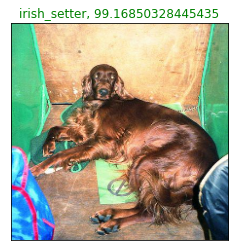

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images, n=1)

In [ ]:
!mkdir models

In [ ]:
modeldir = os.path.join("./models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
model_path = modeldir + "-mobilenet-" + ".h5"
model_1.save(model_path)

In [ ]:
test_path = "../input/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:5]

['../input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg',
 '../input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg',
 '../input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg',
 '../input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg',
 '../input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)


Creating test data batches...


In [ ]:
test_predictions = model_1.predict(test_data, verbose=1)

324/324 [==============================] - 61s 187ms/step


In [ ]:
test_predictions[:2]

array([[2.17894303e-09, 1.32451092e-12, 3.18453708e-09, 1.00284114e-09,
        6.98382929e-02, 8.85079718e-11, 3.13858912e-08, 9.80311711e-07,
        1.72134584e-10, 3.75752442e-08, 2.63711223e-11, 4.84891641e-13,
        3.70122977e-09, 1.42888423e-10, 5.49678525e-09, 2.10066742e-09,
        2.85118906e-09, 1.54719037e-05, 6.09000827e-12, 2.04392418e-05,
        6.43213816e-11, 2.65526352e-04, 2.05833324e-08, 1.72617630e-13,
        6.21153615e-11, 4.76317751e-07, 1.43708874e-07, 1.53135726e-08,
        9.06185527e-09, 5.39030616e-08, 3.17086517e-08, 2.68158634e-10,
        2.48073367e-10, 5.57705704e-09, 4.46749748e-10, 1.59665770e-11,
        2.78472689e-09, 6.95508540e-09, 7.45394302e-11, 3.31046496e-10,
        7.33688610e-10, 6.20229645e-09, 1.71827871e-10, 7.04329650e-10,
        7.08150173e-13, 4.87792160e-04, 9.83298598e-09, 4.32601628e-11,
        1.65248079e-10, 2.44781490e-13, 1.64423564e-12, 5.70325405e-08,
        5.62213037e-12, 1.37824809e-05, 3.88493265e-10, 9.891986

In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f7a32505c12649183c5991ecfa7d68b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bc6d50ffb4644feb34530aa58943e85b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7cbc041e79135a572aad87904b5c9c57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f3b603f10d6a344f0395fb46b242ff8e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,2.178943e-09,1.324511e-12,3.184537e-09,1.002841e-09,6.983829e-02,8.850797e-11,3.138589e-08,9.803117e-07,1.721346e-10,...,2.561041e-08,1.395984e-06,7.497025e-09,9.865679e-08,2.241353e-10,1.579381e-11,4.424939e-08,4.589192e-06,6.134412e-09,2.187881e-08
1,f7a32505c12649183c5991ecfa7d68b3,3.170349e-13,2.111091e-09,2.340968e-12,2.424048e-11,5.939100e-10,7.692732e-10,6.295813e-09,3.802120e-09,7.879085e-09,...,7.130107e-12,2.913604e-12,8.768096e-07,4.651415e-07,3.348598e-11,5.406562e-13,3.527490e-13,2.101705e-09,6.071174e-12,2.384067e-13
2,bc6d50ffb4644feb34530aa58943e85b,3.353887e-09,1.037258e-04,1.257811e-08,4.280104e-07,1.016280e-07,8.122666e-09,1.427195e-10,1.064714e-10,2.371197e-08,...,1.036685e-10,1.094594e-11,6.206048e-12,7.071745e-08,5.882509e-08,1.258199e-09,1.230375e-11,4.166647e-08,9.122088e-11,4.783332e-11
3,7cbc041e79135a572aad87904b5c9c57,7.733960e-10,1.116744e-10,1.127261e-13,1.814970e-09,5.177430e-07,4.788401e-08,1.115165e-09,7.565311e-11,9.960159e-13,...,1.433205e-08,8.202542e-09,1.166093e-10,2.388877e-11,7.737307e-05,1.992356e-12,5.480168e-12,5.949801e-06,9.495493e-10,3.402128e-09
4,f3b603f10d6a344f0395fb46b242ff8e,7.487484e-12,3.822047e-11,2.096931e-11,3.406906e-09,1.819530e-10,7.149826e-09,2.069350e-10,3.434136e-10,4.132829e-08,...,6.346430e-12,3.087882e-11,2.948317e-10,8.942043e-10,3.925358e-13,9.999599e-01,1.548607e-10,6.892967e-12,1.396687e-11,5.283401e-11


In [ ]:
!mkdir ./ans

In [ ]:
preds_df.to_csv("./ans/model_1_ans.csv", index=False)

**Saving  model**

In [ ]:
def save_submit(model, name):
    model.save(f"./models/{name}.h5")
    
    test_path = "../input/dog-breed-identification/test/"
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]
    test_data = create_data_batches(test_filenames, test_data=True)
    test_predictions = model.predict(test_data, verbose=1)
    
    preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
    preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
    preds_df[list(unique_breeds)] = test_predictions
    preds_df.to_csv(f"./ans/model_{name}_ans.csv", index=False)    
    

**Building a model (RESNET-50)** 

In [ ]:
MODEL_URL='https://tfhub.dev/deepmind/bigbigan-resnet50/1'

model_2 = tf.keras.Sequential([
        tf.keras.layers.Resizing(256, 256),
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")])

model_2.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(), 
        optimizer=tf.keras.optimizers.Adam(), 
        metrics=["accuracy"])

model_2.build(INPUT_SHAPE)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 256, 256, 3)       0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 120)               502092751 
_________________________________________________________________
dense_1 (Dense)              (None, 120)               14520     
Total params: 502,107,271
Trainable params: 14,520
Non-trainable params: 502,092,751
_________________________________________________________________


In [ ]:
tensorboard_2 = create_tensorboard_callback()

early_stopping_2 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) 
model_2.fit(x=train_data,
            epochs=NUM_EPOCHS,  
            validation_data=val_data,
            validation_freq=1, 
            callbacks=[tensorboard_2, early_stopping_2])

Epoch 1/100
256/256 [==============================] - 54s 189ms/step - loss: 4.9276 - accuracy: 0.0142 - val_loss: 4.7937 - val_accuracy: 0.0205
Epoch 2/100
256/256 [==============================] - 44s 170ms/step - loss: 4.5596 - accuracy: 0.0504 - val_loss: 4.6239 - val_accuracy: 0.0386
Epoch 3/100
256/256 [==============================] - 42s 164ms/step - loss: 4.3052 - accuracy: 0.0856 - val_loss: 4.5073 - val_accuracy: 0.0543
Epoch 4/100
256/256 [==============================] - 42s 163ms/step - loss: 4.1137 - accuracy: 0.1229 - val_loss: 4.4366 - val_accuracy: 0.0680
Epoch 5/100
256/256 [==============================] - 44s 171ms/step - loss: 3.9655 - accuracy: 0.1460 - val_loss: 4.3855 - val_accuracy: 0.0743
Epoch 6/100
256/256 [==============================] - 44s 170ms/step - loss: 3.8471 - accuracy: 0.1638 - val_loss: 4.3562 - val_accuracy: 0.0763
Epoch 7/100
256/256 [==============================] - 44s 170ms/step - loss: 3.7527 - accuracy: 0.1785 - val_loss: 4.3360 -

In [ ]:
predictions_2 = model_2.predict(val_data, verbose=1) 
predictions_2

64/64 [==============================] - 46s 124ms/step


array([[1.4867168e-04, 6.5440709e-06, 5.2018262e-02, ..., 5.1471905e-04,
        3.0713787e-02, 5.6201179e-04],
       [2.4869305e-03, 1.5385503e-02, 2.1073669e-04, ..., 5.9475880e-03,
        9.7535341e-04, 8.8655893e-03],
       [2.3544990e-02, 4.8202012e-02, 1.9821489e-02, ..., 2.3505581e-04,
        4.6260652e-04, 1.0723637e-03],
       ...,
       [7.7305026e-03, 1.4377477e-02, 9.7037264e-06, ..., 6.6002295e-04,
        1.4780071e-02, 2.1173109e-03],
       [7.3000899e-04, 2.0110745e-04, 4.3058412e-06, ..., 5.0559395e-04,
        4.7468191e-05, 1.0572028e-03],
       [1.4270314e-04, 7.1814386e-05, 5.7190261e-04, ..., 4.5012435e-05,
        5.5518092e-05, 5.1659724e-04]], dtype=float32)

In [ ]:
save_submit(model_2, '2_resnet')

Creating test data batches...
324/324 [==============================] - 53s 160ms/step


**Building a model (Efficientnet)** 

In [ ]:
MODEL_URL='https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2'

model_3 = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")])

model_3.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(), 
        optimizer=tf.keras.optimizers.Adam(), 
        metrics=["accuracy"])

model_3.build(INPUT_SHAPE)
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 21843)             33900195  
_________________________________________________________________
dense_2 (Dense)              (None, 120)               2621280   
Total params: 36,521,475
Trainable params: 2,621,280
Non-trainable params: 33,900,195
_________________________________________________________________


In [ ]:
tensorboard_3 = create_tensorboard_callback()

early_stopping_3 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) 
model_3.fit(x=train_data,
            epochs=NUM_EPOCHS,  
            validation_data=val_data,
            validation_freq=1, 
            callbacks=[tensorboard_3, early_stopping_3])

Epoch 1/100
256/256 [==============================] - 45s 149ms/step - loss: 2687.8818 - accuracy: 0.0102 - val_loss: 1309.3490 - val_accuracy: 0.0147
Epoch 2/100
256/256 [==============================] - 29s 112ms/step - loss: 990.8891 - accuracy: 0.0360 - val_loss: 801.7593 - val_accuracy: 0.0416
Epoch 3/100
256/256 [==============================] - 33s 130ms/step - loss: 636.4369 - accuracy: 0.0752 - val_loss: 459.7213 - val_accuracy: 0.1315
Epoch 4/100
256/256 [==============================] - 28s 109ms/step - loss: 400.3385 - accuracy: 0.1154 - val_loss: 375.5898 - val_accuracy: 0.1066
Epoch 5/100
256/256 [==============================] - 33s 129ms/step - loss: 338.7779 - accuracy: 0.1515 - val_loss: 356.1119 - val_accuracy: 0.2064
Epoch 6/100
256/256 [==============================] - 33s 128ms/step - loss: 324.6681 - accuracy: 0.1707 - val_loss: 295.9322 - val_accuracy: 0.1340
Epoch 7/100
256/256 [==============================] - 28s 109ms/step - loss: 295.0675 - accuracy:

In [ ]:
predictions_3 = model_3.predict(val_data, verbose=1) 
predictions_3

64/64 [==============================] - 6s 87ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
save_submit(model_3, '3_efficientnet')

Creating test data batches...
324/324 [==============================] - 28s 84ms/step


**Building a model (NASNET-50)** 

In [ ]:
MODEL_URL='https://tfhub.dev/google/imagenet/nasnet_large/classification/5'
model_4 = tf.keras.Sequential([
        tf.keras.layers.Resizing(331, 331),
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")])
model_4.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(), 
        optimizer=tf.keras.optimizers.Adam(), 
        metrics=["accuracy"])
model_4.build(INPUT_SHAPE)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 331, 331, 3)       0         
_________________________________________________________________
keras_layer_3 (KerasLayer)   (None, 1001)              88953851  
_________________________________________________________________
dense_3 (Dense)              (None, 120)               120240    
Total params: 89,074,091
Trainable params: 120,240
Non-trainable params: 88,953,851
_________________________________________________________________


In [ ]:
tensorboard_4 = create_tensorboard_callback()
early_stopping_4 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5) 
model_4.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1, callbacks=[tensorboard_4, early_stopping_4])

Epoch 1/100
256/256 [==============================] - 343s 1s/step - loss: 0.8395 - accuracy: 0.8473 - val_loss: 0.2647 - val_accuracy: 0.9276
Epoch 2/100
256/256 [==============================] - 307s 1s/step - loss: 0.1926 - accuracy: 0.9414 - val_loss: 0.2581 - val_accuracy: 0.9252
Epoch 3/100
256/256 [==============================] - 307s 1s/step - loss: 0.1393 - accuracy: 0.9573 - val_loss: 0.2565 - val_accuracy: 0.9291
Epoch 4/100
256/256 [==============================] - 281s 1s/step - loss: 0.1141 - accuracy: 0.9653 - val_loss: 0.2617 - val_accuracy: 0.9306
Epoch 5/100
256/256 [==============================] - 307s 1s/step - loss: 0.0942 - accuracy: 0.9693 - val_loss: 0.2712 - val_accuracy: 0.9271
Epoch 6/100
256/256 [==============================] - 307s 1s/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.2705 - val_accuracy: 0.9306
Epoch 7/100
256/256 [==============================] - 307s 1s/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.2831 - val_accuracy:

In [ ]:
predictions_4 = model_4.predict(val_data, verbose=1) 
predictions_4

64/64 [==============================] - 70s 880ms/step


array([[3.7745644e-07, 5.3359854e-09, 1.4410650e-08, ..., 1.1357923e-07,
        8.2481383e-06, 1.3772500e-06],
       [3.1719310e-07, 1.8824077e-06, 2.5457840e-07, ..., 1.2627459e-07,
        7.6670278e-07, 3.7776279e-06],
       [1.8295297e-05, 7.7124794e-05, 2.9445187e-05, ..., 6.1388323e-06,
        1.7659278e-06, 1.1657869e-05],
       ...,
       [4.9669643e-07, 3.6270427e-07, 2.0889068e-07, ..., 2.4584762e-07,
        1.2178868e-06, 5.0158392e-06],
       [6.6700082e-08, 5.6226696e-08, 1.3669448e-08, ..., 1.9861911e-07,
        2.1126364e-07, 2.9508314e-07],
       [1.9071903e-06, 3.2287642e-06, 4.1067119e-06, ..., 1.4614244e-05,
        3.4335631e-07, 5.7042316e-06]], dtype=float32)

In [ ]:
save_submit(model_4, '4_nasnet')

Creating test data batches...
324/324 [==============================] - 285s 871ms/step
